# Real Estate Price Prediction
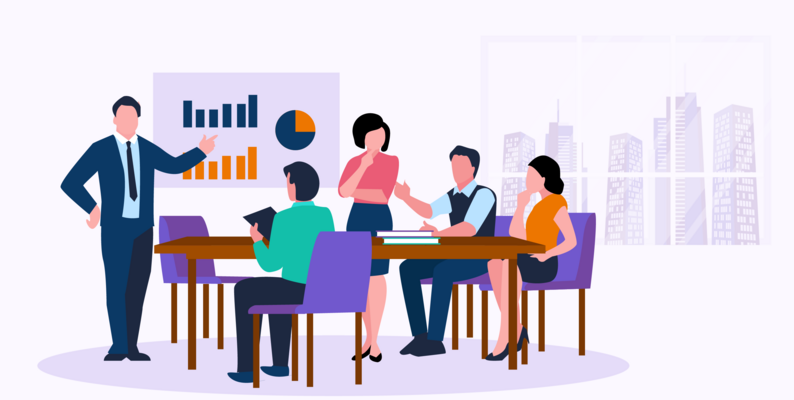

## **Table of Contents**
1. [Introduction](#1)
1. [Import Libraries](#2)
1. [Load and Split Data](#3)
1. [Data Understanding](#4)
1. [Data Preparation](#5)
  * [Drop Outliers](#6)
  * [Check Correlation](#7)
  * [Preprocessing Data](#8)
1. [Modeling](#9)
  * [Polynomial Regression](#10)
  * [XGBRegressor](#11)
  * [Ridge Regression](#12)
  * [Lasso Regression](#13)
1. [Conclusion](#14)

## <a id="1"></a> <br>
# **1. Introduction**

## **Target:**
#### Predict the price of unit area for houses given their features.

#### **Attributes:**
* X1 transaction date
* X2 house age
* X3 distance to the nearest MRT station
* X4 number of convenience stores
* X5 latitude	X6 longitude
* Y house price of unit area

<a id="2"></a> <br>
# **2. Imports**

In [1]:
# Load data libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

# Modeling
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix


!pip install yellowbrick


from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


## <a id="3"></a> <br>
# **3. Load the Data**

In [2]:
# First, let's load the data
df = pd.read_csv('Real_Estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Remove the id column
df.drop('No', inplace=True, axis=1)

# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#Get the info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
# Split the data into train and test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [7]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 331
Test set size: 83


## <a id="4"></a> <br>
# **4. Data Understanding**

In [8]:
train_data.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
159,2012.667,15.5,815.93140,4,24.97886,121.53464,37.4
95,2012.917,8.0,104.81010,5,24.96674,121.54067,51.8
11,2013.333,6.3,90.45606,9,24.97433,121.54310,58.1
374,2013.250,5.4,390.56840,5,24.97937,121.54245,49.5
165,2012.917,13.7,1236.56400,1,24.97694,121.55391,30.6


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 159 to 37
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     331 non-null    float64
 1   house age                            331 non-null    float64
 2   distance to the nearest MRT station  331 non-null    float64
 3   number of convenience stores         331 non-null    int64  
 4   latitude                             331 non-null    float64
 5   longitude                            331 non-null    float64
 6   house price of unit area             331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 20.7 KB


> #### **There are 6 features:**
> #### 1. transaction date                 
> #### 2. house age                        
> #### 3. distance to the nearest MRT station
> #### 4. number of convenience stores        
> #### 5. latitude     
> #### 6. longitude
> 
#### There are **no NULL** values## 

In [10]:
train_data.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2013.169704,17.813595,1052.998068,4.205438,24.969453,121.534048,38.712991
std,0.281697,11.464981,1235.130942,2.926385,0.012370,0.015145,13.814414
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.050000,289.324800,1.000000,24.963050,121.529915,28.450000
50%,2013.167000,16.200000,492.231300,5.000000,24.971100,121.539130,39.300000
75%,2013.417000,29.200000,1410.633500,6.000000,24.978440,121.543480,47.300000
max,2013.583000,42.700000,6488.021000,10.000000,25.014590,121.566270,117.500000


### First let's visualize the features against the price## 

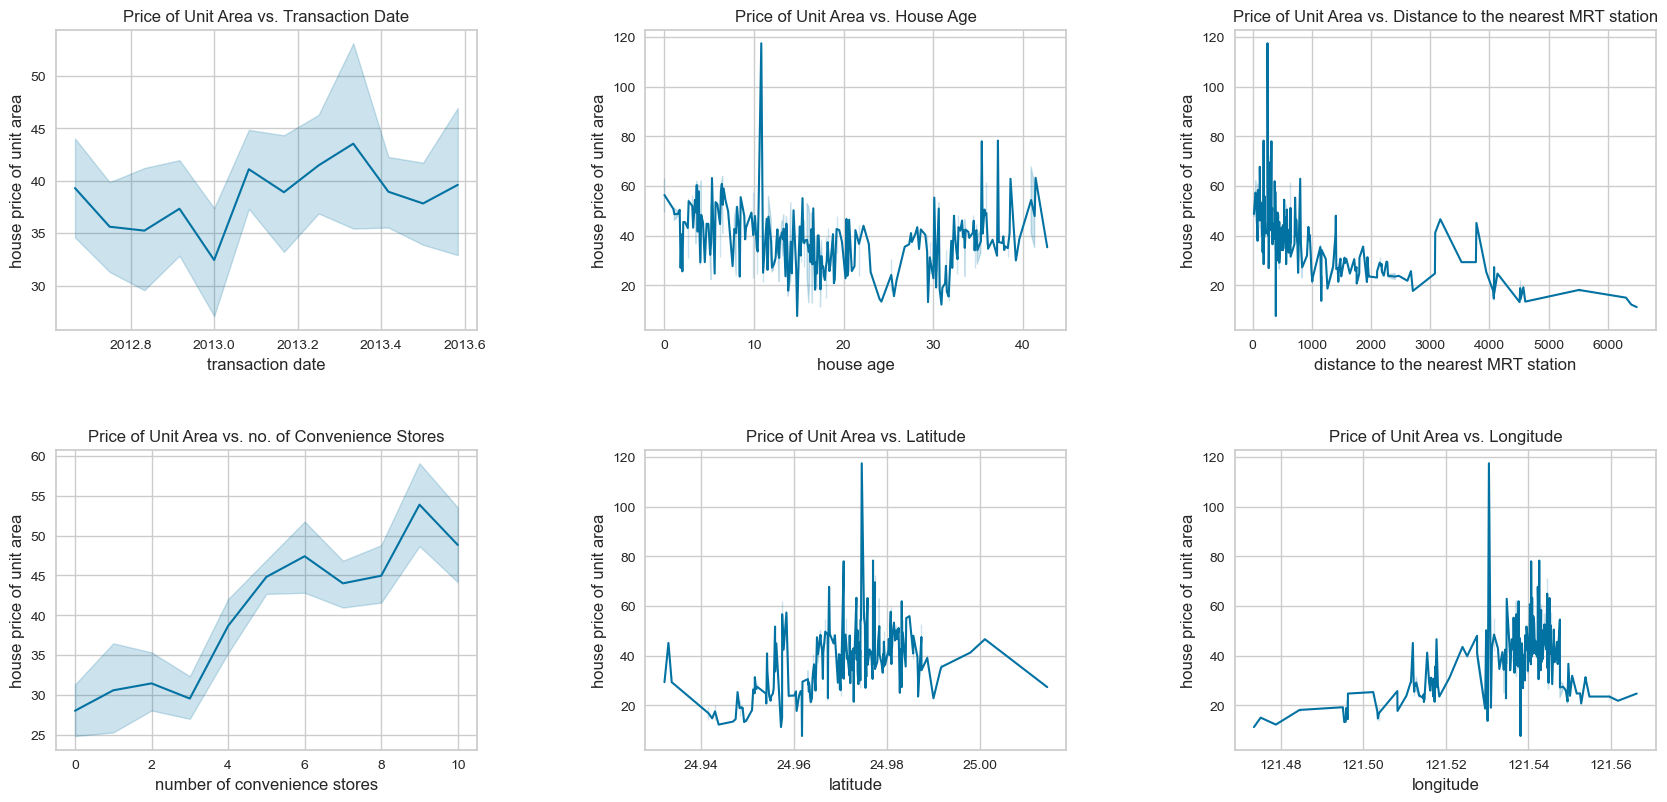

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()
sns.set()
sns.lineplot(data=train_data, x="transaction date", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=train_data, x="house age", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=train_data, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=train_data, x="number of convenience stores", y="house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=train_data, x="latitude", y="house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=train_data, x="longitude", y="house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();

## > * #### We can clearly see that the **house price of unit area** is ***proportional*** to the **number of convenience stores**.
> * #### Additionally, we can see that the **closer the house is to the nearest MRT station**, the ***heigher* the price of unit are** is.
> * #### The ***more* the number of convenience stores** near the house, the the ***higher* the price of the unit area**.
> * #### Unexpectedly, the **house age** is ***not proportional*** to the **price of unit area**, but we can see a pattern and an obvious **outlier**.
> * #### A pattern can be noticed in **longitude** and **latitude**, but we need to explore them more.

## <a id="5"></a> <br>
# **5. Data Preparation**

 ### Let's take a look at the outliers

 #### Distribution

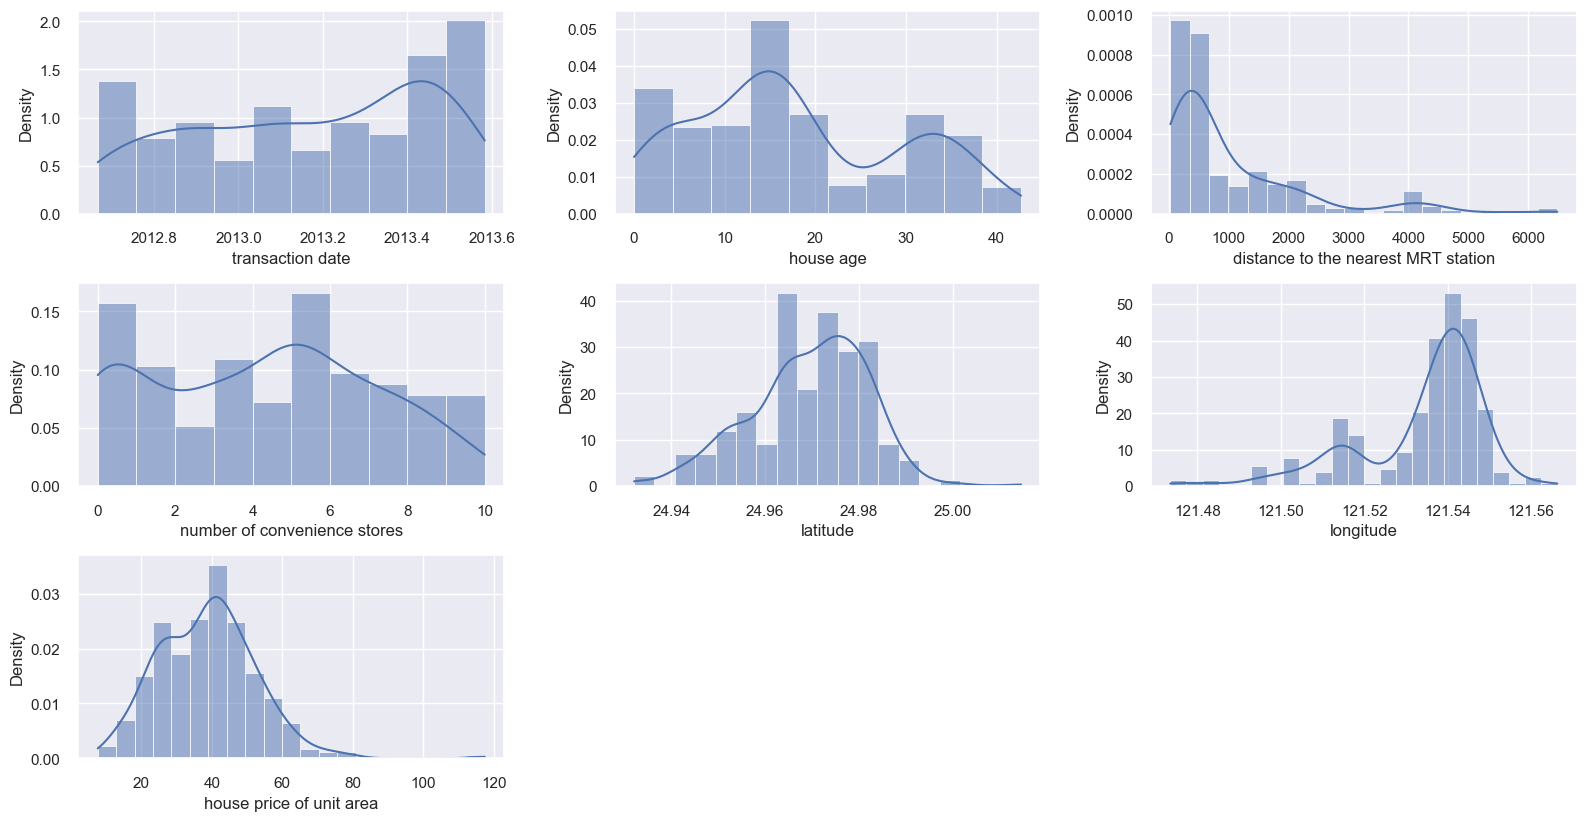

In [12]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

### Boxplot

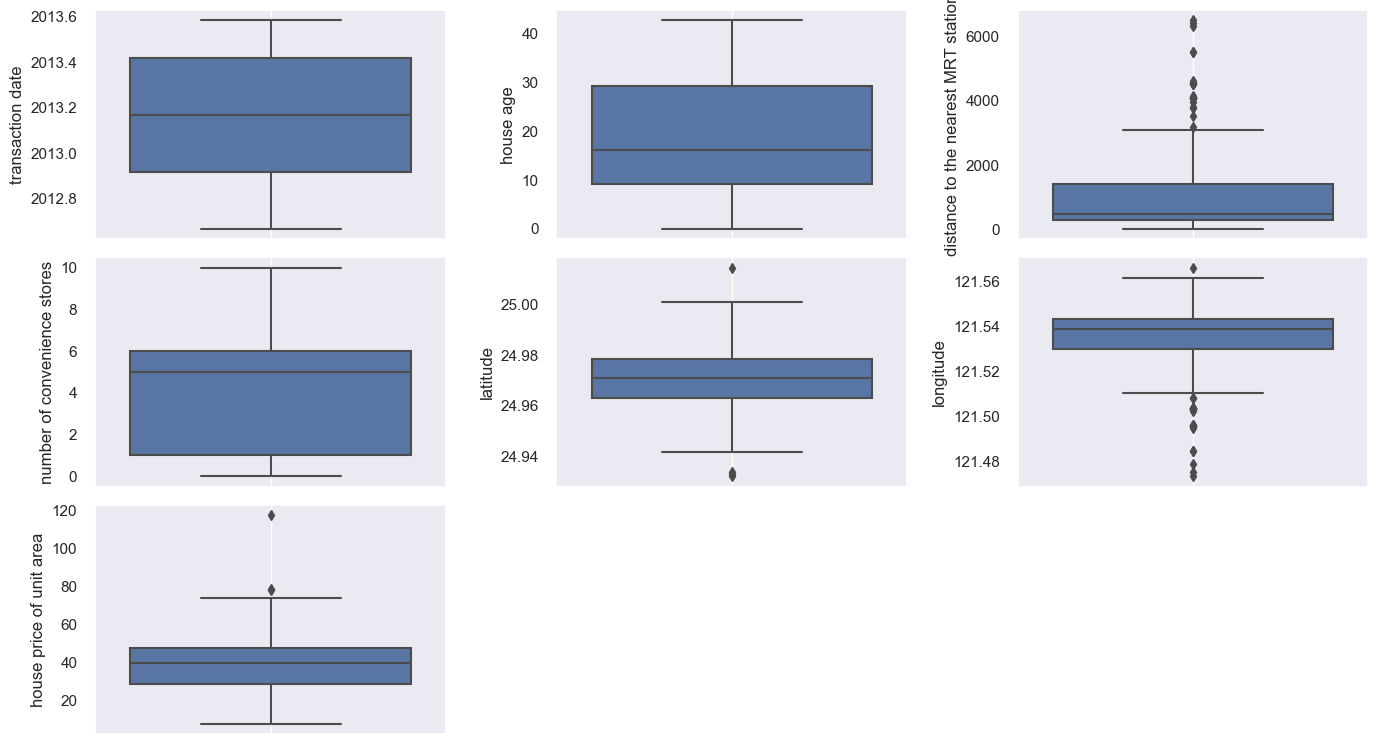

In [13]:
# Check outliers 
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

> #### We can see that there are obvious outliers in:
> * #### `house price of unit area`
> * #### `longitude`
> * #### `distance to the nearest MRT station`

## <a id="6"></a> <br>
### **Drop the outliers**

In [14]:
train_data = train_data[train_data['house price of unit area']<80]
train_data = train_data[train_data['distance to the nearest MRT station']<3000]
train_data = train_data[train_data['longitude']>121.50]

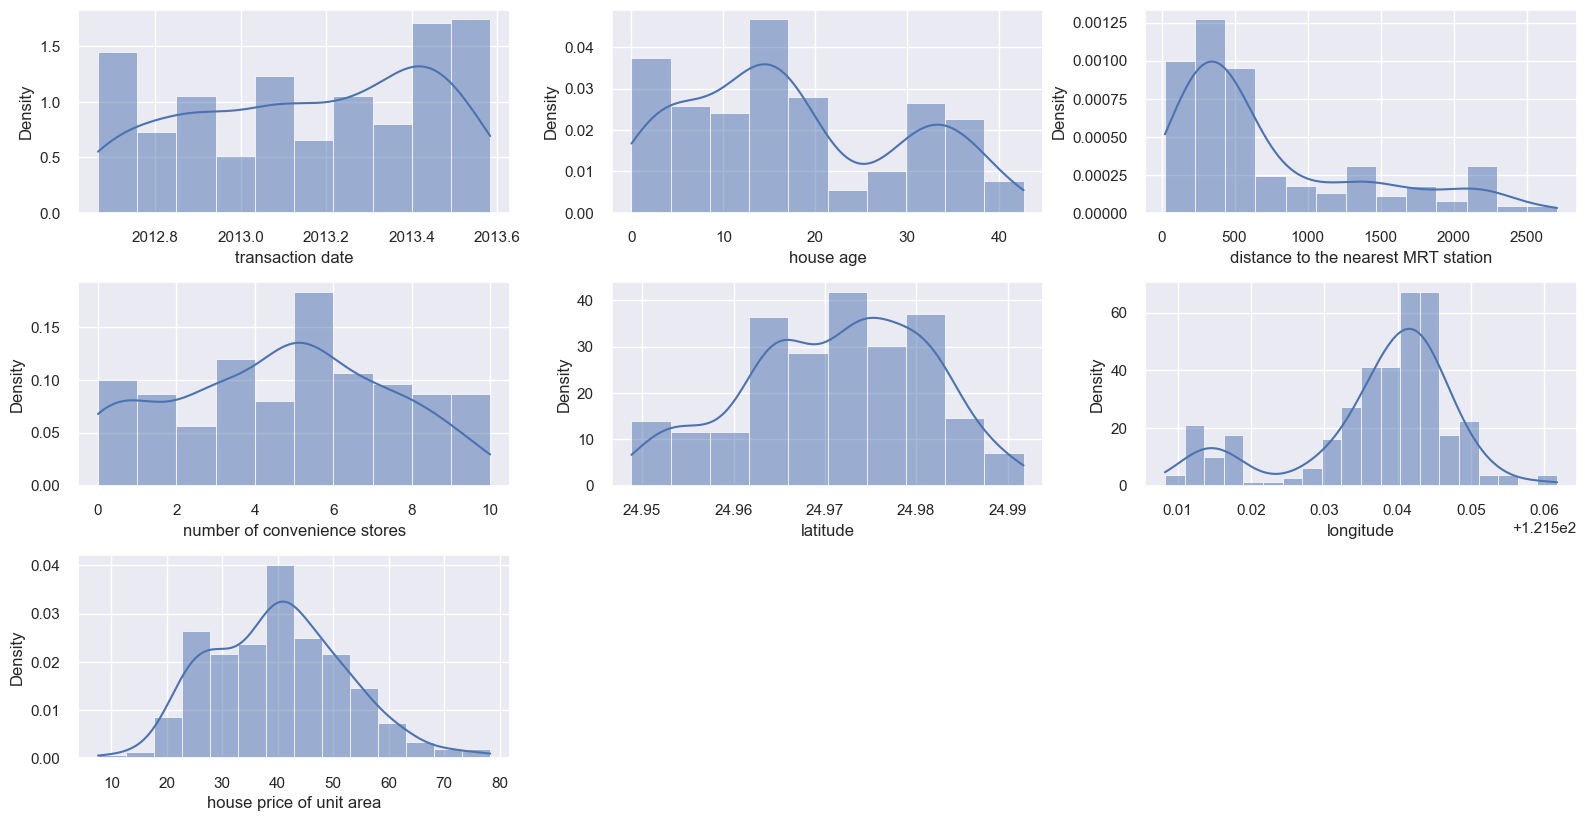

In [15]:
# Check outliers 
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

<a id="7"></a> <br>
### **Check the correlation**

In [16]:
# Corr to price of unit area
numeric_train = train_data
correlation = numeric_train.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'], ascending=False)

,house price of unit area
house price of unit area,1.000000
number of convenience stores,0.549931
latitude,0.442652
longitude,0.358851
transaction date,0.104169
house age,-0.197057
distance to the nearest MRT station,-0.684065


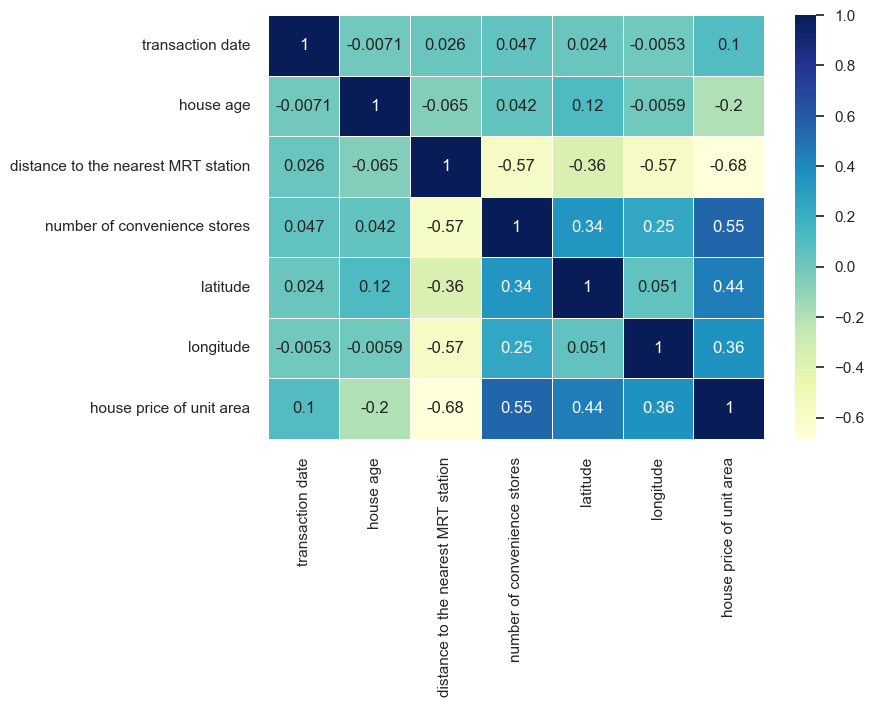

In [17]:
# correlation plot (heatmap)
corr = train_data.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.5);

<a id="8"></a> <br>
### **Preprocessing data**
* #### Convert transaction date to day, month and year columns
* #### Scaling the data

In [18]:
train_data.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
159,2012.667,15.5,815.93140,4,24.97886,121.53464,37.4
95,2012.917,8.0,104.81010,5,24.96674,121.54067,51.8
11,2013.333,6.3,90.45606,9,24.97433,121.54310,58.1
374,2013.250,5.4,390.56840,5,24.97937,121.54245,49.5
165,2012.917,13.7,1236.56400,1,24.97694,121.55391,30.6


In [19]:
# Concat to perform preprocessing and scaling
dfs = [train_data, test_data]
data = pd.concat(dfs)

### Convert transaction date to day, month and year columns

In [20]:
def to_date(data):
    # STEP 1: Convert transaction date to day, month and year columns
    # Create date column with `transaction date` as a date
    data['date'] = pd.to_datetime(data['transaction date'], format='%Y')

    # Create year column
    data['year'] = pd.DatetimeIndex(data['date']).year

    # Create month column by extracting the decimal part of `transaction date` and multiplying it by 12
    data['month'], data['year1'] = data['transaction date'].apply(lambda x: math.modf(x)).str
    data['month'] = data['month']*12

    # Create day column by extracting the decimal part of int
    data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str

    # Convert month to int
    data['month'] = (data['month']).astype(int)

    # Multiply `day` column by 30 + 1 to convert it to days
    data['day'] = (data['day']*30+1).astype(int)

    # Drop unnecessary columns
    data = data.drop(['transaction date', 'date', 'year1'], axis=1, inplace=True)

In [21]:
to_date(data)

### Feature Scaling

In [22]:
# Split the data into X and y
X=data.drop('house price of unit area',axis=1)
y=data['house price of unit area']

In [23]:
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
#       z = (x - u) / s
transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)

### PolynomialFeatures

In [24]:
# Polynomial Features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(X_prep)
poly_features = polynomial_converter.transform(X_prep)

poly_features.shape

(384, 44)

## <a id="9"></a> <br>
# **6. Modeling**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Polynomial Regression

In [26]:
# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict on train data
pred_train_poly = model_poly.predict(X_train)

r2_train_poly = r2_score(y_train, pred_train_poly)
mse_train_poly = mean_squared_error(y_train, pred_train_poly)
rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train, pred_train_poly)

In [28]:
# Predict on validation data
pred_val_poly = model_poly.predict(X_val)

r2_val_poly = r2_score(y_val, pred_val_poly)
mse_val_poly = mean_squared_error(y_val, pred_val_poly)
rmse_val_poly = np.sqrt(mse_val_poly)
mae_val_poly = mean_absolute_error(y_val, pred_val_poly)

In [29]:
pd.DataFrame({'Validation':  [r2_val_poly, mse_val_poly, rmse_val_poly, mae_val_poly],
               'Training': [r2_train_poly, mse_train_poly, rmse_train_poly, mae_train_poly],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.623785,0.791713
MSE,54.044361,31.518480
RMSE,7.351487,5.614132
MAE,5.209245,4.234402


In [30]:
# Finally, predict on test data
pred_test_poly = model_poly.predict(X_test)

r2_test_poly = r2_score(y_test, pred_test_poly)
mse_test_poly = mean_squared_error(y_test, pred_test_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
mae_test_poly = mean_absolute_error(y_test, pred_test_poly)

print('R2 Score: ', r2_test_poly)
print('MSE: ', mse_test_poly)
print('RMSE: ', rmse_test_poly)
print('MAE: ', mae_test_poly)

R2 Score:  0.6932065221028973
MSE:  51.97010315066614
RMSE:  7.209029279359749
MAE:  5.4648822734882305


## Residual plot

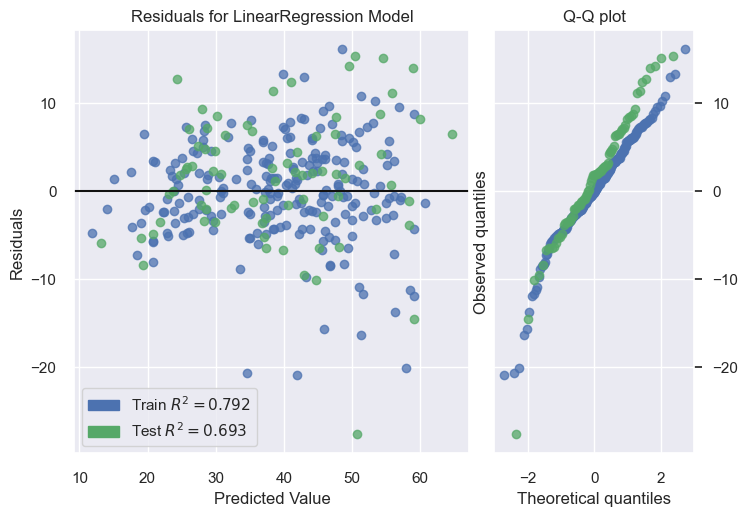

In [31]:
from yellowbrick.regressor import ResidualsPlot

# Your code utilizing ResidualsPlot here

visualizer = ResidualsPlot(model_poly, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

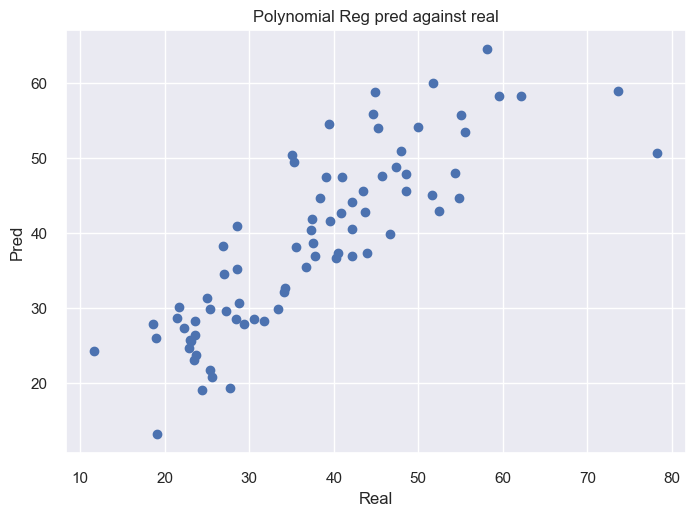

In [32]:
plt.scatter(y_test, pred_test_poly)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Polynomial Reg pred against real')
plt.show()

## XGBRegressor

In [33]:
# Fit the model
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
# Predict on train data
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [35]:
# Predict on validation data
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [36]:
pd.DataFrame({'Validation':  [r2_val_xgbr, mse_val_xgbr, rmse_val_xgbr, mae_val_xgbr],
               'Training': [r2_train_xgbr, mse_train_xgbr, rmse_train_xgbr, mae_train_xgbr],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.693785,0.900300
MSE,43.988684,15.086785
RMSE,6.632397,3.884171
MAE,4.881239,2.952029


In [37]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

print('R2 Score: ', r2_test_xgbr)
print('MSE: ', mse_test_xgbr)
print('RMSE: ', rmse_test_xgbr)
print('MAE: ', mae_test_xgbr)

R2 Score:  0.7920014457150022
MSE:  35.234472373647726
RMSE:  5.935863237444721
MAE:  4.295330761005352


### Residual plot

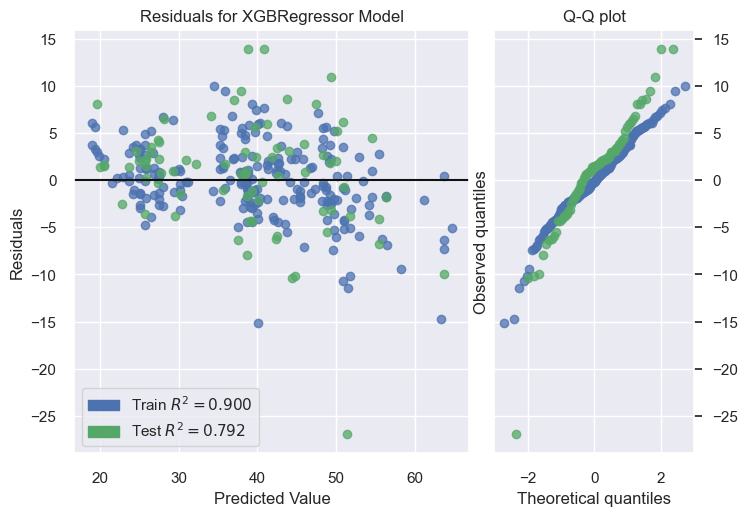

In [38]:
visualizer = ResidualsPlot(model_xgbr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

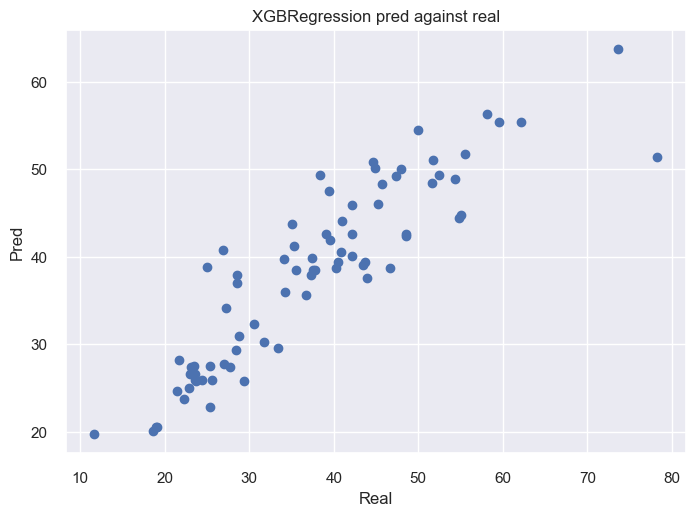

In [39]:
plt.scatter(y_test, pred_test_xgbr)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('XGBRegression pred against real')
plt.show()

## <a id="12"></a> <br>
# L2 Regularization - Ridge Regression

In [40]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [41]:
# Predict on train data
pred_train_ridge = model_ridge.predict(X_train)

r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [42]:
# Predict on validation data
pred_val_ridge = model_ridge.predict(X_val)

r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [43]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.600325,0.774585
MSE,57.414447,34.110226
RMSE,7.577232,5.840396
MAE,5.499518,4.472234


In [44]:
# Cross-validation method to evaluate model
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01), scoring='neg_mean_absolute_error')

In [45]:
model_ridge_cv.fit(X_train, y_train)

print("alpha: ", model_ridge_cv.alpha_)

alpha:  0.01


In [46]:
# Predict on validation data
pred_val_ridge = model_ridge_cv.predict(X_val)

r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [47]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val, mse_val, rmse_val, mae_val],
               'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.600325,0.623769
MSE,57.414447,54.046727
RMSE,7.577232,7.577232
MAE,5.499518,5.209371


In [48]:
#### The model has improved and we can see that alpha = 0.01 is better

In [49]:
# Finally, predict on test data
pred_test_ridge = model_ridge_cv.predict(X_test)

r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print('R2 Score: ', r2_test_ridge)
print('MSE: ', mse_test_ridge)
print('RMSE: ', rmse_test_ridge)
print('MAE: ', mae_test_ridge)

R2 Score:  0.6934662846338571
MSE:  51.92609998077746
RMSE:  7.577232126940363
MAE:  5.462028591751424


### Residual plot

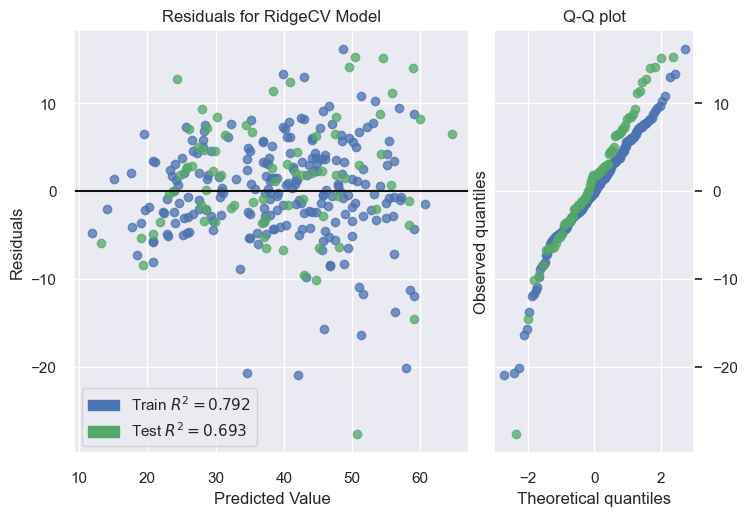

In [50]:
visualizer = ResidualsPlot(model_ridge_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

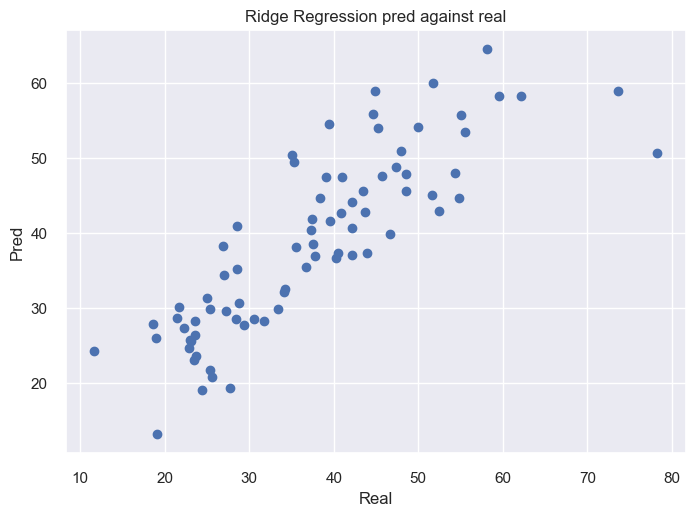

In [51]:
plt.scatter(y_test, pred_test_ridge)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Ridge Regression pred against real')
plt.show()

## <a id="13"></a> <br>
# L1 Regularization - Lasso Regression

In [52]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [53]:
# Predict on train data
pred_train_lasso = model_lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train)
mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [54]:
# Predict on validation data
pred_val_lasso = model_lasso.predict(X_val)

r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [55]:
pd.DataFrame({'Validation':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Training': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.637893,0.772010
MSE,52.017775,34.499944
RMSE,7.577232,5.840396
MAE,5.185595,4.365759


In [56]:
# Cross-validation method to evaluate model
#model_lasso_cv = LassoCV(eps=0.01, n_alphas=50000, cv=10)
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [57]:
model_lasso_cv.fit(X_train, y_train)

print("alpha: ", model_lasso_cv.alpha_)

alpha:  0.1622182019083469


In [58]:
# Predict on validation data
pred_val_lasso2 = model_lasso_cv.predict(X_val)

r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [59]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Validation 2': [r2_val2_lasso, mse_val2_lasso, rmse_val2_lasso, mae_val2_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.637893,0.635305
MSE,52.017775,52.389482
RMSE,7.577232,7.577232
MAE,5.185595,5.209678


Not much difference

In [60]:
model_lasso_cv.coef_

array([-3.49187858, -7.5914135 ,  2.22945381,  2.56907502,  0.55603855,
        0.        ,  0.22079446,  0.53318031,  2.37866215,  0.25549898,
       -0.        , -0.0276687 , -0.52157607,  0.79356054, -0.        ,
        0.26680502,  0.35571105, -1.16320736, -1.81035921, -0.        ,
       -0.14864736, -0.        , -0.        , -0.        , -2.0862012 ,
        0.        ,  0.        ,  0.14623379,  0.        , -0.        ,
        0.        , -0.        , -0.37353163,  0.28420618, -0.        ,
        0.4046966 , -0.        ,  0.67476313, -0.        ,  1.65083189,
        0.        , -0.        , -0.        ,  0.        ])

In [61]:
# Finally, predict on test data
pred_test_lasso = model_lasso_cv.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)

print('R2 Score: ', r2_test_lasso)
print('MSE: ', mse_test_lasso)
print('RMSE: ', rmse_test_lasso)
print('MAE: ', mae_test_lasso)

R2 Score:  0.7277709705403466
MSE:  46.114965802398935
RMSE:  7.577232126940363
MAE:  5.102112417507631


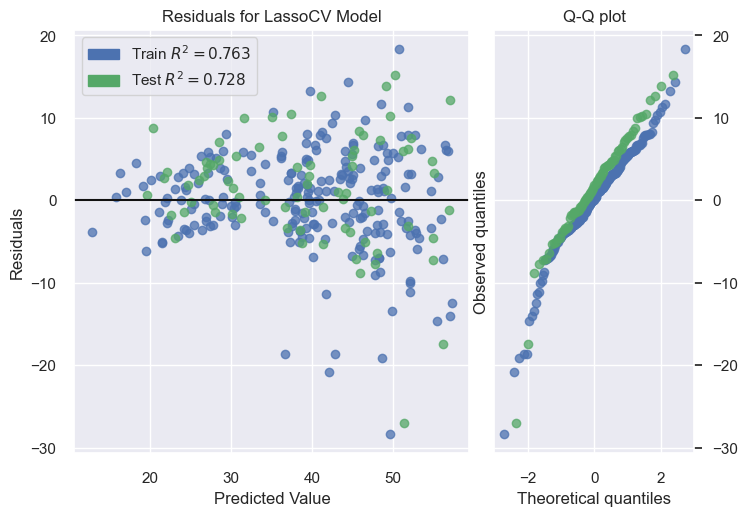

In [62]:
visualizer = ResidualsPlot(model_lasso_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

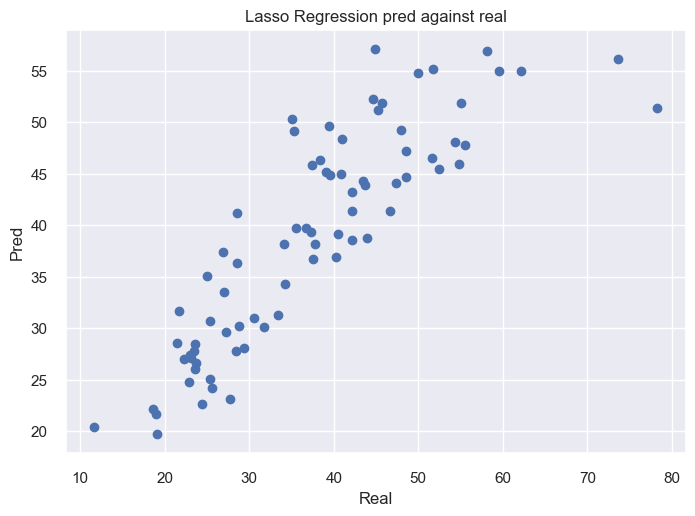

In [63]:
plt.scatter(y_test, pred_test_lasso)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Lasso Regression pred against real')
plt.show()

## <a id="14"></a> <br>
# **7. Conclusion**

### R2 Score of the models

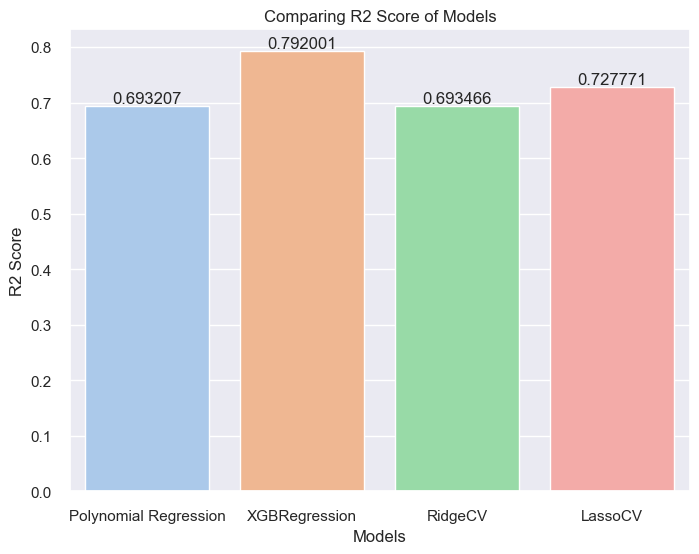

In [64]:
sns.set()
plt.figure(figsize=(8,6))

models = ['Polynomial Regression', 'XGBRegression', 'RidgeCV', 'LassoCV']
r2 = [r2_test_poly, r2_test_xgbr, r2_test_ridge, r2_test_lasso]
ax = sns.barplot(x = models, y = r2, palette='pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models');

### RMSE of the models

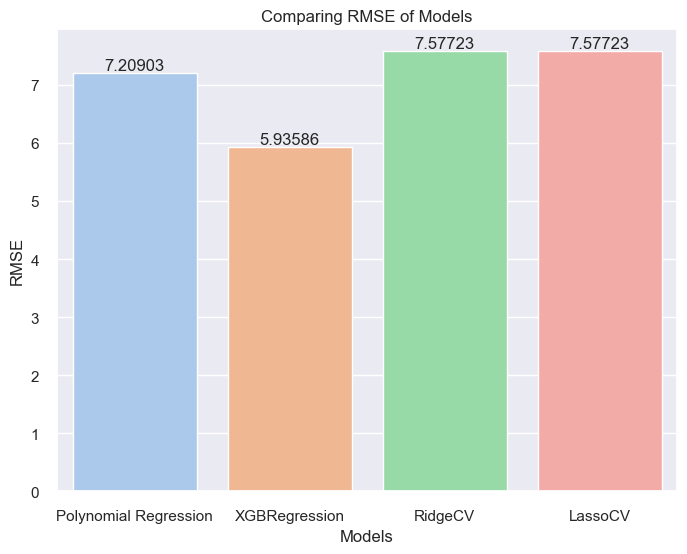

In [65]:
sns.set()
plt.figure(figsize=(8,6))
rmse = [rmse_test_poly, rmse_test_xgbr, rmse_test_ridge, rmse_test_lasso]
ax = sns.barplot(x = models, y = rmse, palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');

 #### We can see that the `XGBRegression` Model performs the best
 * R2 Score: 0.780957
* RMSE: 6.09142

   ## Thank You!